In [78]:
!nvidia-smi

Sat Nov 23 17:43:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# New Section

In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [79]:
import pandas as pd
imbalance_data = pd.read_csv('/content/imbalanced_data.csv')
imbalance_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


EDA

<Axes: xlabel='label', ylabel='count'>

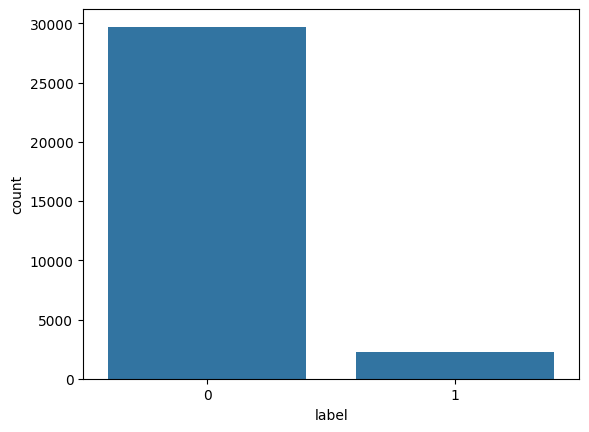

In [82]:
import seaborn as sns
sns.countplot(x='label', data=imbalance_data)

*   0 -----> No Hate
*   1 -----> Hate

In [83]:
imbalance_data.shape

(31962, 3)

In [84]:
imbalance_data.isnull().sum()

,0
id,0
label,0
tweet,0


In [85]:
# prompt: drop id column and write code as .head()

imbalance_data = imbalance_data.drop('id', axis=1)
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [86]:
raw_data = pd.read_csv('/content/raw_data.csv')
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [87]:
# prompt: print shape and null value sum for raw_data.csv

print(raw_data.shape)
print(raw_data.isnull().sum())


(24783, 7)
Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [88]:
# prompt: drop all columns of raw_data.csv except class and tweet using .drop method

cols_to_drop = [col for col in raw_data.columns if col not in ['class', 'tweet']]
raw_data = raw_data.drop(columns=cols_to_drop)
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [89]:
# prompt: I want to check unique values in class column

print(raw_data['class'].unique())

[2 1 0]


<Axes: xlabel='class', ylabel='count'>

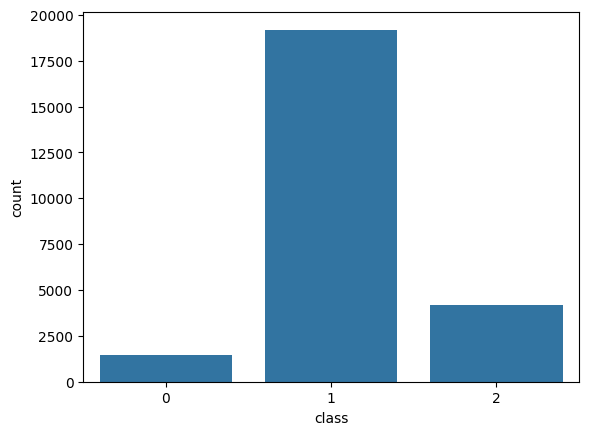

In [90]:
# prompt: plot the count oc unique values of class column using sns

sns.countplot(x='class', data=raw_data)




*   Class 0: Hate
*   Class 1: Abusive
*   Class 2: No Hate



<Axes: xlabel='class', ylabel='count'>

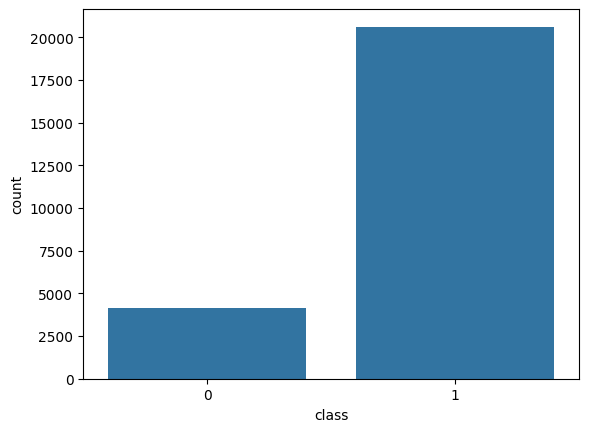

In [91]:
# prompt: In class column ,
# Class 0: Hate
# Class 1: Abusive
# Class 2: No Hate
# so merge class 0 and class 1 ,  and make all as class 1 as Hate

# Merge Class 0 and Class 1 into Class 1 (Hate)
raw_data['class'] = raw_data['class'].replace(0, 1)
raw_data['class'] = raw_data['class'].replace(2, 0)
sns.countplot(x='class', data=raw_data)

In [92]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [93]:
raw_data.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [94]:
# prompt: rename column name class to label

raw_data = raw_data.rename(columns={'class': 'label'})
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [95]:
# prompt: concatinate both the data into a single dataframe as df

df = pd.concat([imbalance_data, raw_data], axis=0)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [96]:
df.shape

(56745, 2)

<Axes: xlabel='label', ylabel='count'>

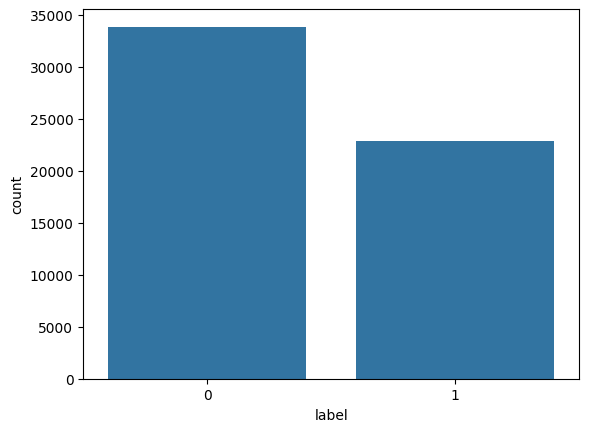

In [97]:
# prompt: now visualize label

sns.countplot(x='label', data=df)

Preprocessing

In [98]:
# prompt: download stopwords using nltk re and other required libraries

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [100]:
# prompt: lets apply regex and do cleaning also use above variables stemmer and stopword
import string
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

df['tweet'] = df['tweet'].apply(clean)

In [101]:
df.head()

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunc...
1,0,user user thank lyft credit cant use caus dont...
2,0,bihday majesti
3,0,model love u take u time urð± ððð...
4,0,factsguid societi motiv


In [168]:
# prompt: split the data into train test split , random_state=42 and print all variable len

from sklearn.model_selection import train_test_split

X = df['tweet']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("X_train length:", len(X_train))
print("X_test length:", len(X_test))
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

X_train length: 42558
X_test length: 14187
y_train length: 42558
y_test length: 14187


Feature Engineering


In [169]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [170]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

In [171]:
sequences_matrix

array([[    0,     0,     0, ..., 15028,  6270,  3012],
       [    0,     0,     0, ...,   407,    95,   235],
       [    0,     0,     0, ...,   680,   634, 15029],
       ...,
       [    0,     0,     0, ...,   111,    77, 46968],
       [    0,     0,     0, ...,   910, 11895,   712],
       [    0,     0,     0, ...,   350,   314,     2]], dtype=int32)

In [172]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Activation , Input, SpatialDropout1D

In [173]:
# prompt: import RMSprop

from keras.optimizers import RMSprop

In [174]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, max_len))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)             │ (None, 300, 100)            │       5,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_6                  │ (None, 300, 100)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,080,501 (19.38 MB)

 Trainable params: 5,080,501 (19.38 MB)

 Non-trainable params: 0 (0.00 B)

### Detailed Model Architecture Workflow

1. **Input Layer**  
   - **What it does**: Accepts input sequences of integers, where each integer represents a token in the vocabulary.  
   - **Output it provides**: A sequence of shape `(None, 300)` where 300 is the length of each sequence.  

2. **Embedding Layer**  
   - **What it does**: Converts integer tokens into dense vector representations of size 100, creating word embeddings.  
   - **Input it receives**: A sequence of shape `(None, 300)`.  
   - **Output it provides**: A 3D tensor of shape `(None, 300, 100)`, where each token is represented as a 100-dimensional vector.  

3. **SpatialDropout1D**  
   - **What it does**: Applies dropout to the embeddings to regularize the model and prevent overfitting.  
   - **Input it receives**: A tensor of shape `(None, 300, 100)`.  
   - **Output it provides**: A tensor of the same shape `(None, 300, 100)` with randomly dropped values.  

4. **LSTM Layer**  
   - **What it does**: Processes the sequential data to capture temporal dependencies and outputs a fixed-size feature vector.  
   - **Input it receives**: A tensor of shape `(None, 300, 100)`.  
   - **Output it provides**: A 2D tensor of shape `(None, 100)` where 100 represents the hidden state size of the LSTM.  

5. **Dense Layer**  
   - **What it does**: Produces a single output value for binary classification using a sigmoid activation function.  
   - **Input it receives**: A tensor of shape `(None, 100)`.  
   - **Output it provides**: A tensor of shape `(None, 1)` where the value represents the probability of the positive class.  


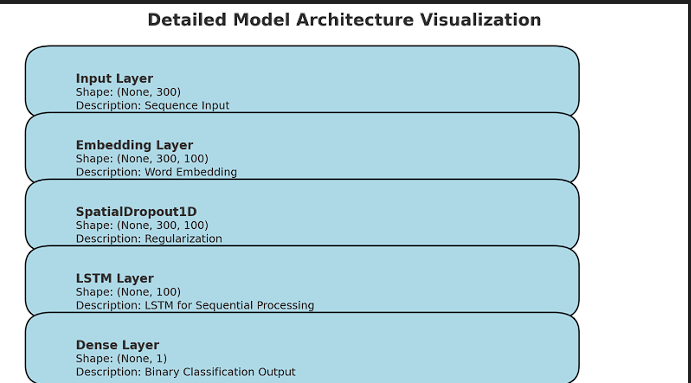

In [175]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [176]:
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs =5, validation_split=0.2)

Epoch 1/5
266/266 ━━━━━━━━━━━━━━━━━━━━ 157s 585ms/step - accuracy: 0.8156 - loss: 0.4107 - val_accuracy: 0.9429 - val_loss: 0.1707
Epoch 2/5
266/266 ━━━━━━━━━━━━━━━━━━━━ 201s 583ms/step - accuracy: 0.9420 - loss: 0.1639 - val_accuracy: 0.9445 - val_loss: 0.1584
Epoch 3/5
266/266 ━━━━━━━━━━━━━━━━━━━━ 197s 563ms/step - accuracy: 0.9538 - loss: 0.1365 - val_accuracy: 0.9451 - val_loss: 0.1557
Epoch 4/5
266/266 ━━━━━━━━━━━━━━━━━━━━ 150s 564ms/step - accuracy: 0.9620 - loss: 0.1143 - val_accuracy: 0.9457 - val_loss: 0.1593
Epoch 5/5
266/266 ━━━━━━━━━━━━━━━━━━━━ 201s 562ms/step - accuracy: 0.9674 - loss: 0.1059 - val_accuracy: 0.9450 - val_loss: 0.1626


In [177]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [178]:
test_sequences_matrix

array([[    0,     0,     0, ...,  1401,     2,  2903],
       [    0,     0,     0, ...,   776,  2521, 14986],
       [    0,     0,     0, ...,   181,   214,   976],
       ...,
       [    0,     0,     0, ...,   217,    19,   221],
       [    0,     0,     0, ...,   352,     1,     1],
       [    0,     0,     0, ...,   265,   785,   244]], dtype=int32)

In [179]:
# Model Evaluation
accr = model.evaluate(test_sequences_matrix,y_test)


444/444 ━━━━━━━━━━━━━━━━━━━━ 57s 128ms/step - accuracy: 0.9424 - loss: 0.1862


In [180]:
lstm_prediction = model.predict(test_sequences_matrix)

444/444 ━━━━━━━━━━━━━━━━━━━━ 58s 131ms/step


In [181]:
res = []
for i in lstm_prediction:
    if i > 0.5:
        res.append(1)
    else:
        res.append(0)

In [182]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,res))

[[8215  238]
 [ 567 5167]]


In [183]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [184]:
model.save("model.h5")

In [185]:
# prompt: load that model

import keras
import pickle

# Load the model
load_model = keras.models.load_model("model.h5")

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [189]:
# Let's test our model on custom data.
test = 'I love my mother'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


I love my mother
i love my mother
['love mother']
[[6, 616]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
pred [[0.08750228]]
no hate
